In [ ]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib를 인라인 환경에서 사용하겠다고 이야기 해주는것
%matplotlib inline

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 Survived와 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? SibSp? Parch?


In [ ]:
## 데이터 불러오기

titanic_df = pd.read_csv('./titanic/train.csv')
titanic_df  

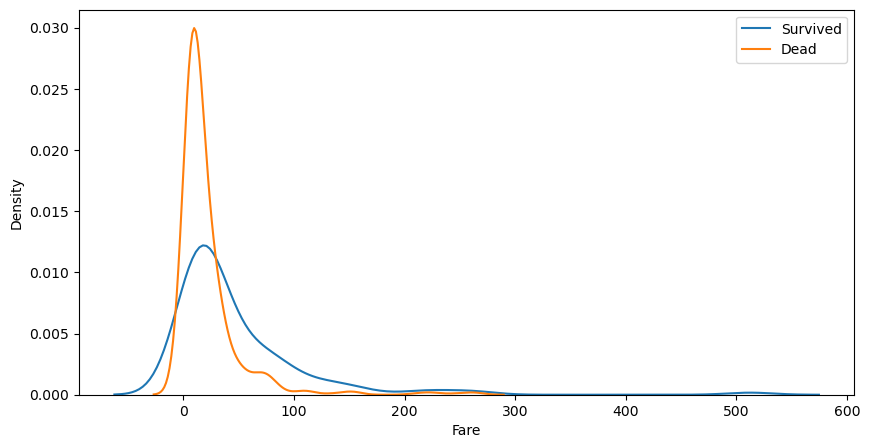

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x = titanic_df[titanic_df['Survived'] == 1]['Fare'], ax=ax)
sns.kdeplot(x = titanic_df[titanic_df['Survived'] == 0]['Fare'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show()

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### About this dataset

id: 데이터 고유 id

age: 나이

sex: 성별 (여자 = 0, 남자 = 1)

cp: 가슴 통증(chest pain) 종류 

    0 : asymptomatic 무증상
    1 : atypical angina 일반적이지 않은 협심증
    2 : non-anginal pain 협심증이 아닌 통증
    3 : typical angina 일반적인 협심증

trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)

chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)

fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)

restecg: (resting electrocardiographic) 휴식 중 심전도 결과 

    0: showing probable or definite left ventricular hypertrophy by Estes' criteria
    1: 정상
    2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
thalach: (maximum heart rate achieved) 최대 심박수

exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)

oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강

slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기

    0: downsloping 하강
    1: flat 평탄
    2: upsloping 상승
ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
Null 값은 숫자 4로 인코딩됨 

thal: thalassemia 지중해빈혈 여부

    0 = Null 
    1 = normal 정상
    2 = fixed defect 고정 결함
    3 = reversable defect 가역 결함
target: 심장 질환 진단 여부

    0: < 50% diameter narrowing
    1: > 50% diameter narrowing

### 가설설정: 

1. 혈중 콜레스테롤(chol)이 높은 사람들 심장질환에 걸릴확률이 높을 것이다.

2. 최대 심박수(thalach)가 높은 사람들 심장질환에 걸릴확률이 높을 것이다.

3. exang(활동으로 인한 협심증 여부)가 있는 사람들은 심장질환에 걸릴확률이 높을 것이다.

1. 데이터 불러오기

In [ ]:
heart = pd.read_csv('./heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


종속변수 값 분포 살펴보기

In [ ]:
heart['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

데이터 정보 확인

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. 혈중 콜레스테롤(chol)이 높은 사람들 심장질환에 걸릴확률이 높을 것이다.

=> **그렇지 않다!** 오히려 콜레스테롤이 높은 사람들이 더 안전했다.

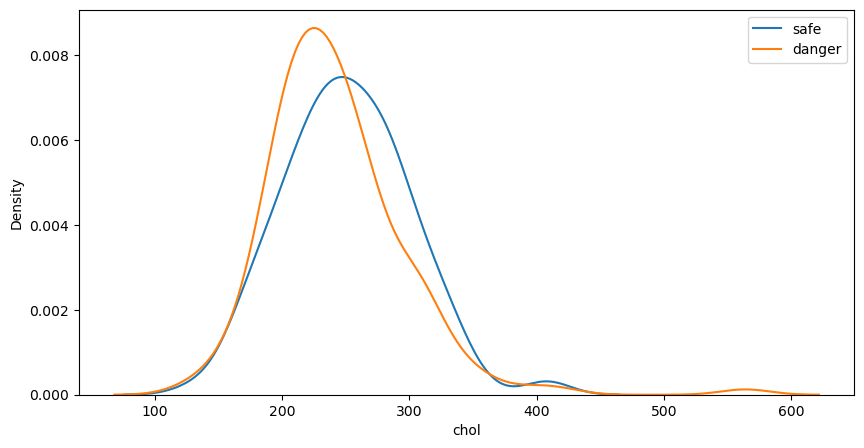

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x = heart[heart['output'] == 0]['chol'], ax=ax)
sns.kdeplot(x = heart[heart['output'] == 1]['chol'], ax=ax)
plt.legend(['safe', 'danger'])
plt.show()

가슴에 통증을 가지고 있을 수록 심장질환을 가질 확률이 높았다.

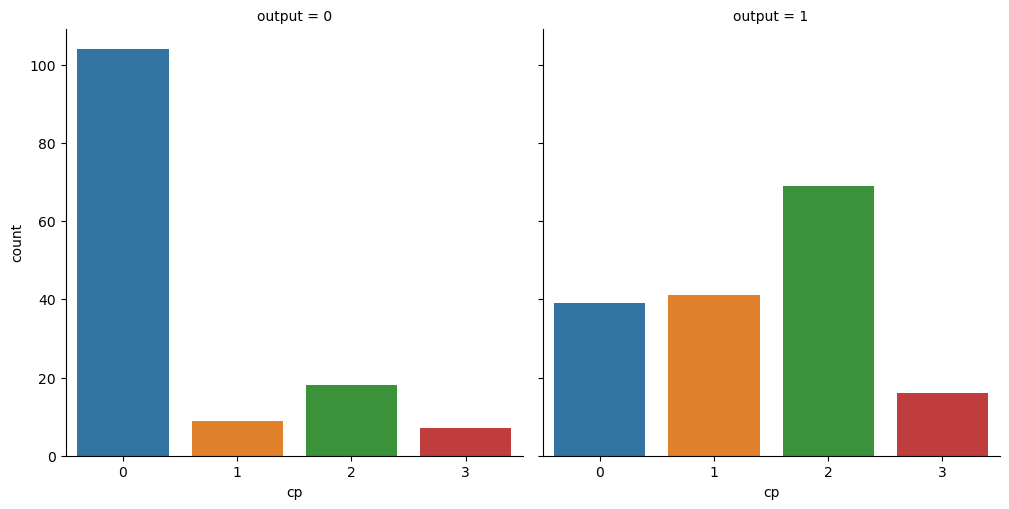

In [ ]:
sns.catplot(x = 'cp', col = 'output', kind = 'count', data = heart)
plt.show()

2. 최대 심박수(thalach)가 높은 사람들 심장질환에 걸릴확률이 높을 것이다.

-> 그러한 것으로 나타났다.

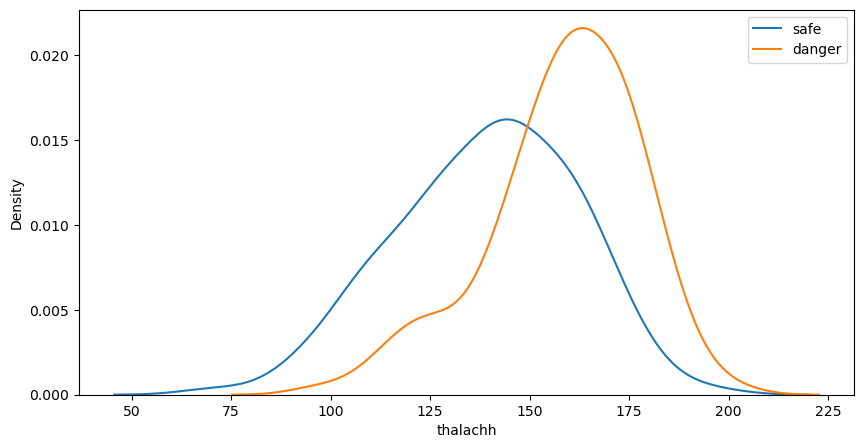

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x = heart[heart['output'] == 0]['thalachh'], ax=ax)
sns.kdeplot(x = heart[heart['output'] == 1]['thalachh'], ax=ax)
plt.legend(['safe', 'danger'])
plt.show()

# 심장병을 가지고 있는 사람들이 전반적으로 높은 최대 심박수를 가지고 있는것으로 보인다.

3. exang(활동으로 인한 협심증 여부)가 있는 사람들은 심장질환에 걸릴확률이 높을 것이다.
-> 그렇지 않다. 오히려 활동으로 인한 협심증 여부가 없는 사람들이 더 심장병에 걸릴 확률이 높았다!

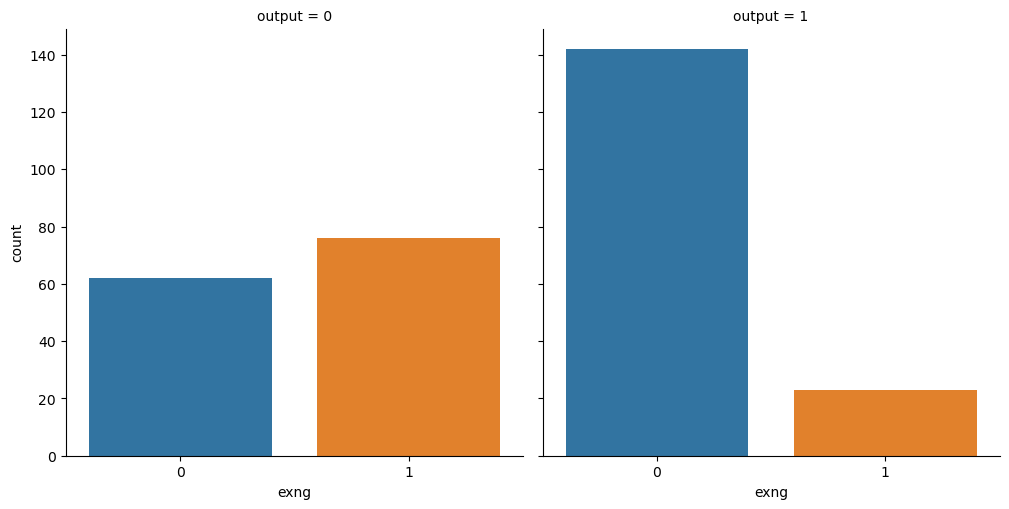

In [ ]:
sns.catplot(x = 'exng', col = 'output', kind = 'count', data = heart)
plt.show()


지중해 빈혈을 가지고 있는사람들(thall =2,3)이 심장질환을 가지고 있는 사람들에게서 더 많이 관측된다.

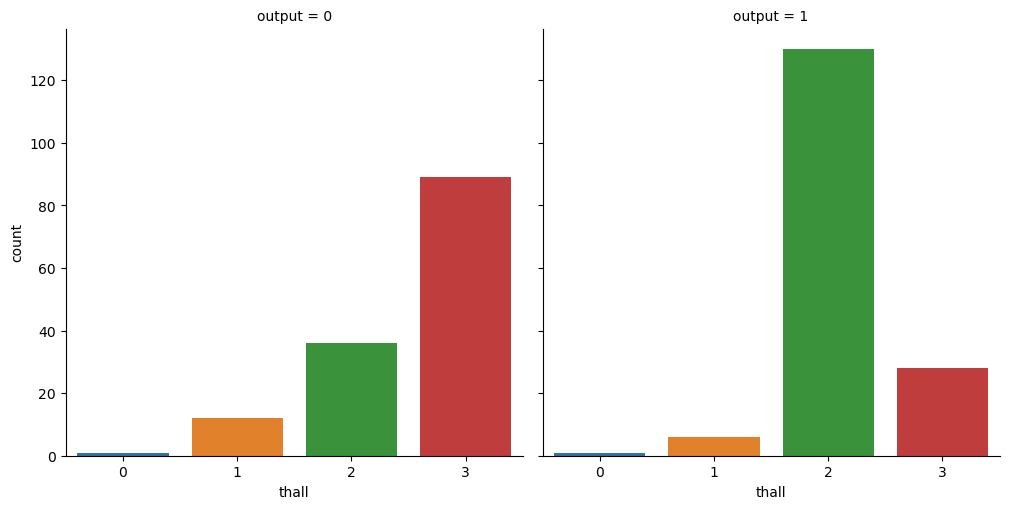

In [ ]:
sns.catplot(x = 'thall', col = 'output', kind = 'count', data = heart)
plt.show()